## Data Source Access in JupyterLab

This code snippet demonstrates how to interact with a data source using the `domino.data_sources.DataSourceClient` from the Domino Data Lab environment. Specifically, it performs the following operations:

1. **Initialization**: Instantiates a `DataSourceClient` object to interact with the available data sources.
2. **Data Source Fetching**: Retrieves a specific data source instance named "winequality".
3. **Object Listing**: Lists all objects available in the "winequality" data source.

The commented sections of the code provide examples of additional operations:
- **Binary Content Retrieval**: Shows how to fetch the binary content of a specified object.
- **File Download**: Illustrates downloading the content of a specified object to a local file.
- **File Object Download**: Demonstrates downloading content directly into a Python `io.BytesIO()` file object for further manipulation within the notebook.

In [1]:
from domino.data_sources import DataSourceClient

# instantiate a client and fetch the datasource instance
object_store = DataSourceClient().get_datasource("winequalityworkshop")

# list objects available in the datasource
objects = object_store.list_objects()

## get content as binary
# content = object_store.get("key")

## download content to file
# object_store.download_file("key", "./path/to/local/file")

## Download content to file object
# f = io.BytesIO()
# object_store.download_fileobj("key", f)

## Data Loading and Display in JupyterLab

This code snippet is designed to demonstrate the process of loading and displaying data within a JupyterLab environment, particularly using the `pandas` library for handling CSV data. The operations performed are as follows:

1. **Data Retrieval**: Retrieves the binary content of the "WineQualityData.csv" file from a data source, converting it to a UTF-8 string.
2. **String to Data Stream**: Converts the string data into a stream using `StringIO`, making it readable by pandas.
3. **Data Frame Creation**: Loads the data into a pandas DataFrame by reading from the StringIO object.
4. **Display Data**: Displays the first few rows of the DataFrame to provide a snapshot of the dataset.

This snippet is particularly useful for quickly visualizing the structure and a portion of the data directly from a data source managed by Domino's `DataSourceClient`.


In [2]:
from io import StringIO
import pandas as pd

s=str(object_store.get("WineQualityData.csv"),'utf-8')
data = StringIO(s) 

df=pd.read_csv(data)
df.head()

,id,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,5.58
1,1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,5.04
2,2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,5.34
3,3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,4.92
4,4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,5.16


## Visualizing Data Correlations in JupyterLab

This code snippet uses Python libraries `seaborn` and `matplotlib` to visualize correlations between numeric features of a dataset within a JupyterLab environment. The operations performed include:

1. **Column Creation**: Adds a new column `is_red` to the DataFrame `df`. This column is a binary indicator where 1 represents 'red' wine types based on the `type` column of the DataFrame.
2. **Figure Setup**: Sets up a figure with a specified size (10x10 inches) using `matplotlib`.
3. **Heatmap Generation**: Generates a heatmap of the correlation matrix of numeric-only columns in `df` using `seaborn`. Correlation values are annotated and formatted to one decimal place.

This visualization is helpful for identifying relationships between different numeric features, especially in contexts like feature selection or initial data analysis.

<Axes: >

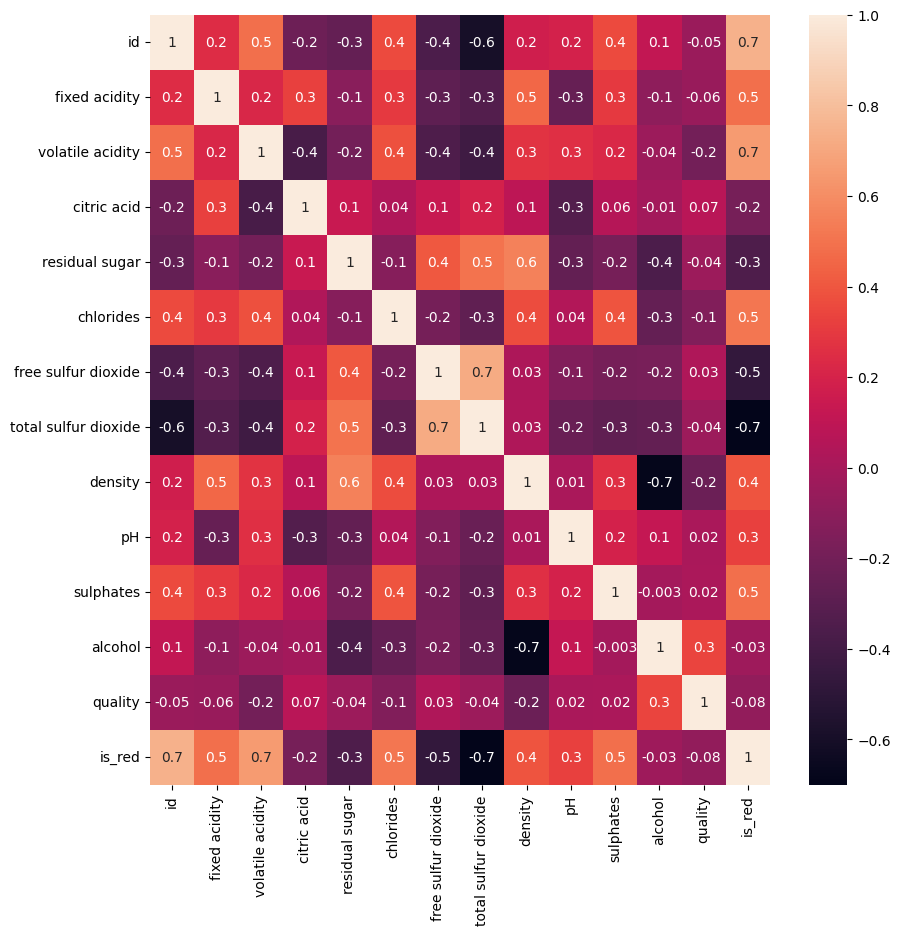

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
df['is_red'] = df.type.apply(lambda x : int(x=='red'))
fig = plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot = True, fmt='.1g')

## Feature Importance Visualization for Wine Quality in JupyterLab

This code snippet demonstrates how to identify and visualize important features related to the 'quality' variable of a dataset using Python libraries `seaborn` and `matplotlib`. The snippet performs the following steps:

1. **Correlation Calculation**: Computes the Pearson correlation coefficients between all numeric features and the 'quality' feature of the DataFrame `df`.
2. **Sorting and Filtering**: Sorts these coefficients by their values associated with 'quality' and filters out the 'quality' column itself. It then selects features with an absolute correlation value greater than 0.08, considering these as important features.
3. **Visualization Setup**: Sets the theme for the plot using `seaborn` and initializes a figure with a size of 16x5 inches.
4. **Bar Plot Creation**: Creates a bar plot to display the Pearson correlation values of the identified important features. The plot has a title and labels for clarity, and uses a 'seismic_r' color palette to differentiate the values.

This approach is useful for quickly identifying which features have a significant correlation with the target variable 'quality', aiding in feature selection and preliminary data analysis.

density            -0.234881
volatile acidity   -0.199486
chlorides          -0.148369
is_red             -0.080618
alcohol             0.341581
Name: quality, dtype: float64


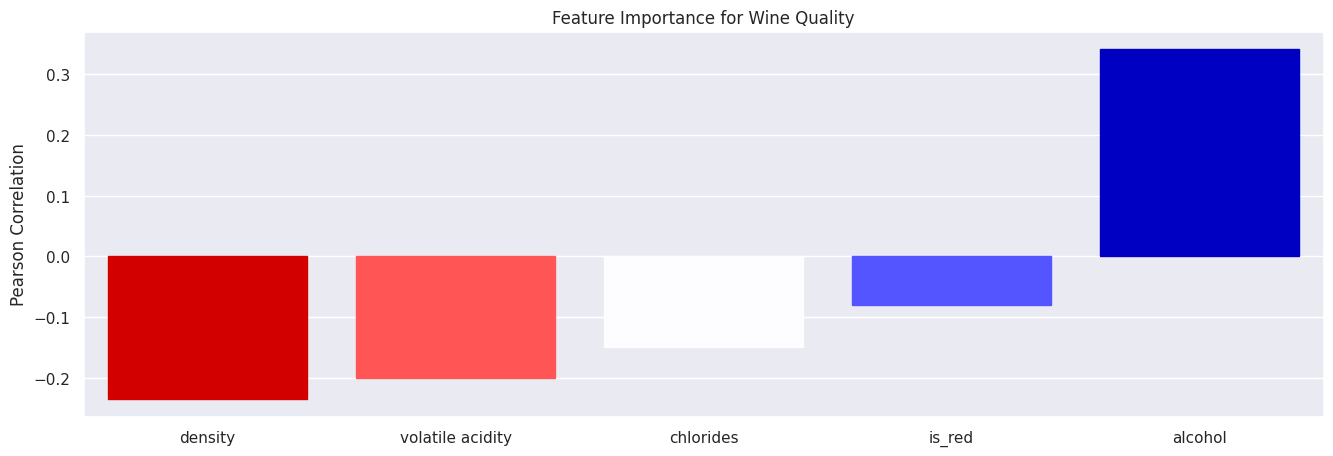

In [4]:
# Calculate the correlation and sort by 'quality'
corr_values = df.corr(numeric_only=True).sort_values(by='quality')['quality'].drop('quality', axis=0)
important_feats = corr_values[abs(corr_values) > 0.08]
print(important_feats)

# Set the theme
sns.set_theme(style="darkgrid")

# Prepare the figure
plt.figure(figsize=(16, 5))
plt.title('Feature Importance for Wine Quality')
plt.ylabel('Pearson Correlation')

# Create a barplot without a palette argument, using a default color temporarily
ax = sns.barplot(x=important_feats.keys(), y=important_feats.values, color='gray')

# Get colors from the 'seismic_r' palette based on the number of entries
palette = sns.color_palette("seismic_r", len(important_feats))

# Set the colors for each bar individually
for bar, color in zip(ax.patches, palette):
    bar.set_color(color)

# Show the plot
plt.show()

## Histogram Visualization of Important Features and Wine Quality in JupyterLab

This code snippet is designed to visualize the distribution of important features identified as having a significant correlation with wine quality, along with the distribution of the quality itself, using Python libraries `seaborn` and `matplotlib`. The snippet executes the following steps:

1. **Loop Through Features**: Iterates over the keys of the `important_feats` dictionary (features with a strong correlation to 'quality') and includes the 'quality' column itself.
2. **Histogram Plotting**:
   - For each feature in the loop, it initializes a new figure with a predefined size (8x5 inches).
   - Sets a title specific to the feature being plotted.
   - Uses `seaborn.histplot` to create a histogram with a kernel density estimate (KDE) overlay for each feature. This helps in visualizing the distribution and density of the data points.

This method provides a detailed look at the distribution characteristics of each key feature, assisting in understanding the variability and distribution trends within the data set.

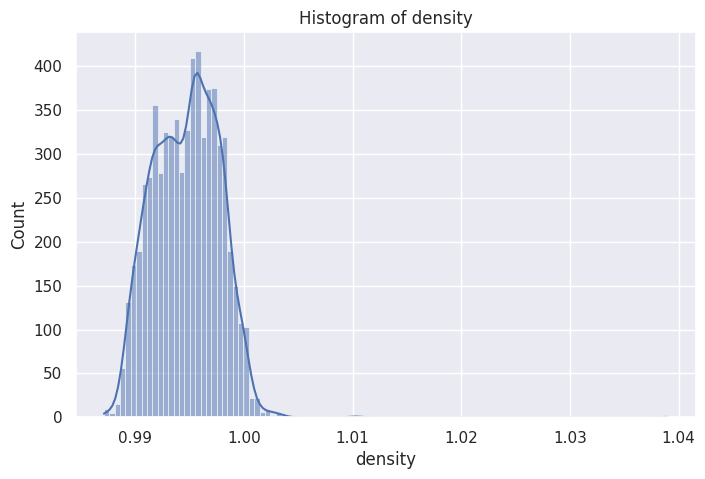

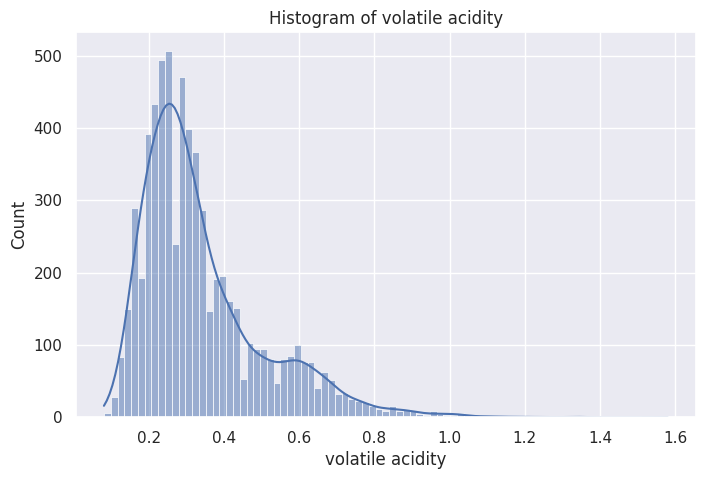

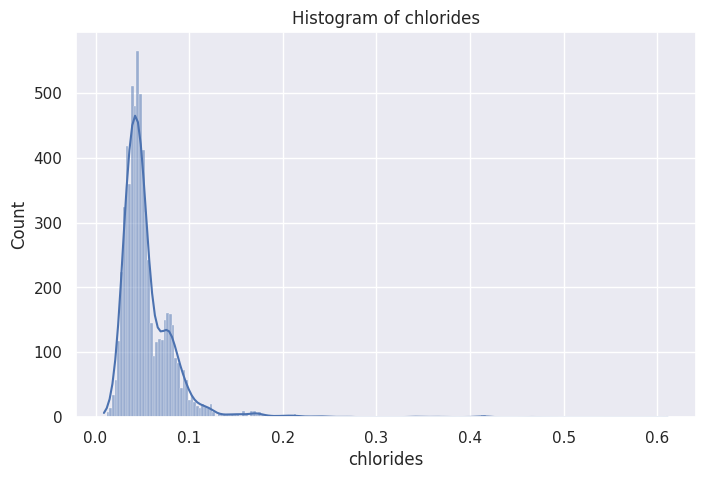

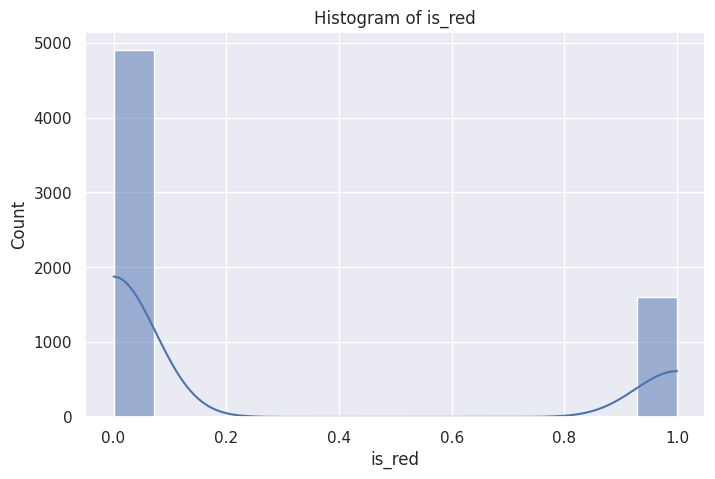

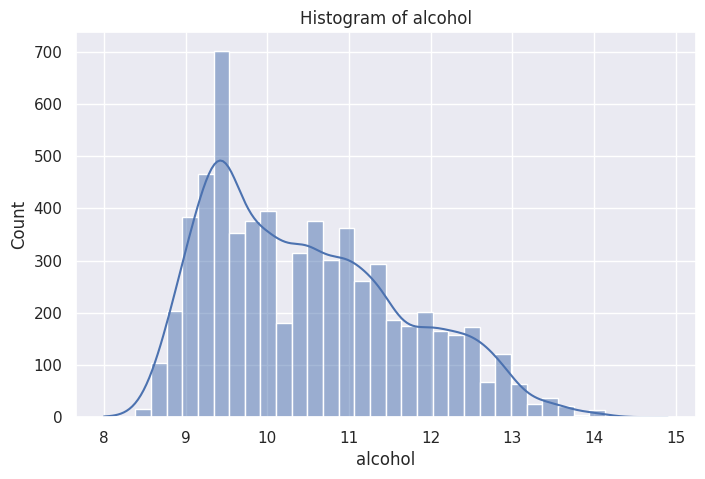

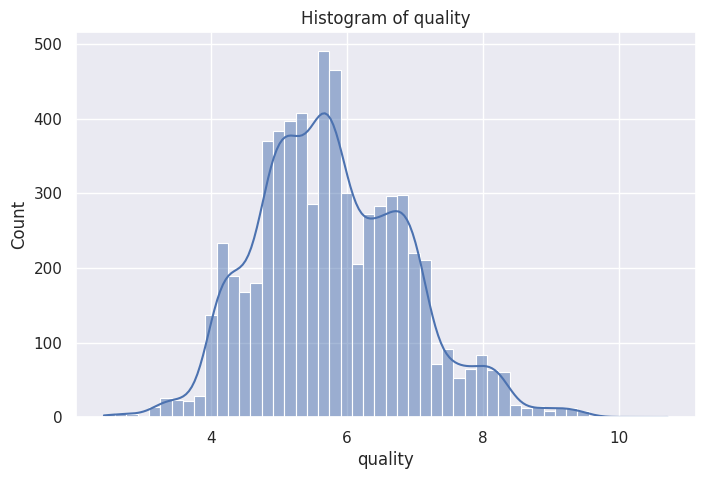

In [5]:
for i in list(important_feats.keys()) + ['quality']:
    plt.figure(figsize=(8, 5))
    plt.title(f'Histogram of {i}')
    sns.histplot(df[i].dropna(), kde=True)

## Saving DataFrame to CSV in a Project-Specific Path in JupyterLab

This code snippet demonstrates how to save a pandas DataFrame to a CSV file in a project-specific directory within the JupyterLab environment. The snippet carries out the following operations:

1. **Path Construction**: Constructs the file path using the environment variable `DOMINO_PROJECT_NAME` to dynamically create a directory path within `/mnt/data/`. This path points to where the 'WineQualityData.csv' will be saved, ensuring the file location is relative to the current Domino project.
2. **Save DataFrame**: Utilizes the `to_csv` method of the pandas DataFrame `df` to write the DataFrame to the constructed path without including the index column in the output file.

This approach ensures that the output CSV file is easily accessible within the specific context of the current Domino project, promoting better organization and data management practices.

In [6]:
import os
path = str('/mnt/data/{}/WineQualityData.csv'.format(os.environ.get('DOMINO_PROJECT_NAME')))
df.to_csv(path, index = False)